# INF01017 - Aprendizado de Máquina (2022/2)

Profª Mariana Recamonde Mendoza

# TRABALHO PRÁTICO 1 - CLASSIFICAÇÃO DE OBJETOS ESTELARES

**GRUPO 10**

Alice Santin Varella - 00259915 - asvarella@inf.ufrgs.br

Leonardo de Souza Augusto - 00278998 - lsaugusto@inf.ufrgs.br

Ronald de Souza Maciel - 00281987 - rsmaciel@inf.ufrgs.br


 ## Introdução

Espectroscopia é o estudo dos fenômenos físico-químicos que ocorrem durante a interação de radiação eletromagnética com matéria. A observação das variações nos níveis de energia de moléculas ou átomos é capaz de fornecer informações cruciais sobre a natureza do objeto observado, seja ele um corpo estelar de dimensões inimagináveis ou uma substância em um pequeno tubo de ensaio de laboratório.

A partir de uma base de dados com 100 mil instâncias de observações e classificações feitas pelo *Sloan Digital Sky Survey* (SDSS), o grupo fez uso de modelos preditivos de aprendizado de máquina para criar um classificador de objetos estelares capaz de avaliar se um determinado corpo celeste é uma estrela, uma galáxia ou um quasar. Para isso, foram utilizados algoritmos de aprendizado supervisionado. A avaliação foi feita com o uso de K-Fold Cross Validation e de métricas de avaliação de modelos.

# Passos Iniciais
Importar bibliotecas e fazer a leitura dos dados que serão utilizados no estudo.

## Imports

In [ ]:
!pip install mlxtend #instalando biblioteca mlxtend

In [ ]:
# imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Fazendo a leitura dos dados:


In [ ]:
data = pd.read_csv('https://drive.google.com/uc?export=view&id=1lfZtV9ci2q36HLkq6GbVrh7BI-1BAHns')
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [ ]:
data.info()

-----

# Pré-Processamento dos dados
Nessa etapa, é necessário certificar-se de que o conjunto dos dados está adequadamente organizado. Um mau conjunto de dados resulta em um desempenho aquém do esperado, independentemente do modelo ser bom ou não.

## Checagem por duplicatas e atributos nulos

In [ ]:
## Removendo possíveis dados duplicados
## Essa base de dados é bem organizada e nenhuma instância é removida, mas a checagem é pertinente

data.drop_duplicates(keep='last').shape

In [ ]:
## Checando possíveis elementos nulos ao longo da tabela

data.isnull()

## Seleção de atributos
Para essa seleção de atributos, foi executado o algoritmo das árvores de decisão. Interpretando os resultados, a remoção dos atributos menos relevantes foi feita manualmente.

In [ ]:
## Com base nos pesos calculados pela arvore de decisão, esses atributos são os menos importantes na classificação
data = data.drop(['obj_ID','alpha','delta','i','r','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','plate','MJD','fiber_ID'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   u         100000 non-null  float64
 1   g         100000 non-null  float64
 2   z         100000 non-null  float64
 3   class     100000 non-null  object 
 4   redshift  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


## Balanceamento dos dados
Checando proporções entre as classes de saída do dataset. Dados muito desbalanceados são problemáticos

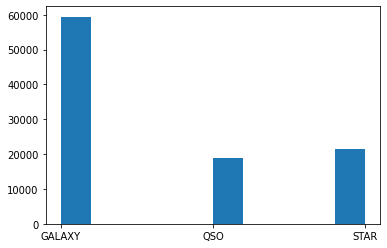

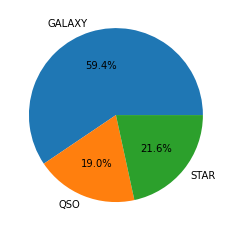

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [ ]:
## Gerando gráficos e dados numéricos a respeito do conteúdo da base de dados

## Histograma
plt.hist(data['class'])
plt.show()

## Gerando gráfico em pizza com percentuais
class_frequency = collections.Counter(data['class'])
plt.pie(class_frequency.values(), labels=class_frequency.keys(), autopct='%1.1f%%')
plt.show()

## Mostrando o valor bruto da frequência de cada classe na base de dados
data['class'].value_counts()

Os dados acima acusam um grande desbalanceamento na distribuição das classes. Enquanto foram registradas (aproximadamente) 21 mil ocorrências para estrelas e 19 mil para quasares, o conjunto de dados apresenta quase 60 mil ocorrências de galáxias somente.

Tal discrepância é esperada devido ao fato de que os dados são um estudo de corpos celestes do espaço profundo; nesses casos, a incidência de galáxias observadas é consistentemente muito maior do que a incidência de outros corpos estelares.

Ainda assim, para o treinamento dos modelos, será necessária a manutenção dessa discrepância fazendo o balanceamento do conjunto de dados.

### Solução: Undersampling +  SMOTE

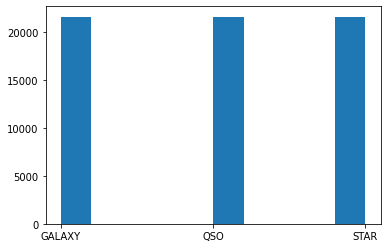

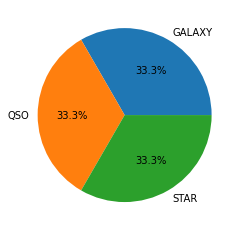

In [ ]:
## Executando Undersampling + SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import SMOTE

## Separando a base de dados em atributos (x) e classificação (y)
x = data.drop(['class'], axis = 1)
y = data.loc[:,'class'].values

## Frequência de cada classe - Para estratégia de Undersample
class_frequency = collections.Counter(data['class'])

## Definindo estratégia de SMOTE
sm = SMOTE(sampling_strategy = 'minority')

## Definindo estratégia de Undersample
undersampling_strategy = {'GALAXY': class_frequency.get('STAR'), 'STAR': class_frequency.get('STAR')}
undersample = RandomUnderSampler(sampling_strategy = undersampling_strategy)

## Normalizando os dados e mostrando gráfico com dados balanceados
x, y = undersample.fit_resample(x,y)
x, y = sm.fit_resample(x, y)

## Histograma
plt.hist(y)
plt.show()

## Gráfico em pizza
balanced_class_frequency = collections.Counter(y)
plt.pie(balanced_class_frequency.values(), labels=balanced_class_frequency.keys(), autopct='%1.1f%%')
plt.show()

## Codificação de valor categórico para valor numérico

In [ ]:
# Codificar a classe de valor categórico nominal para valor numérico
encoded_data = pd.get_dummies(y, columns=['class'])
print(encoded_data['GALAXY'].value_counts())
print(encoded_data['QSO'].value_counts())
print(encoded_data['STAR'].value_counts())

0    43188
1    21594
Name: GALAXY, dtype: int64
0    43188
1    21594
Name: QSO, dtype: int64
0    43188
1    21594
Name: STAR, dtype: int64


---------------

# Implementações de Avaliação de Desempenho:

Para avaliação do desempenho, foram implementados dois métodos de avaliação:


*   Matriz de Confusão
*   *K-fold Cross Validation* (Estratificado)

A seção abaixo documenta as implementações próprias do grupo para a matriz de confusão e o k-fold.

## 1. Implementação da Matriz de Confusão

As células abaixo apresentam várias funções criadas como base para a implementação `confusionMatrix()` feita pelo grupo.

A primeira função, `getClassIndex()`, identifica qual coluna do conjunto `predicted[][]` corresponde à classe que está sendo avaliada no treinamento:

In [ ]:
## Calcula o índice de cada classLabel na matriz de predicted:
def getClassIndex(label):
    if label == 'GALAXY':
        return 0
    elif label == 'QSO':
        return 1
    else:
        return 2

A segunda função, `confusionMatrixValues()`, opera cada classe c1, c2 ou c3 separadamente, capturando valores de VP, VN, FP e FN para a classe designada individualmente. Esses valores são retornados na ordem citada.

In [ ]:
## calcula valores de VP, VN, FP e FN para um dado label
def confusionMatrixValues(X_test, y_test, predicted, classLabel): 
    labelIndex = getClassIndex(classLabel)
    ## pega total de positivos e negativos
    positives_count = y_test[classLabel].value_counts().to_list()[1]
    negatives_count = y_test[classLabel].value_counts().to_list()[0]
    
    expected = y_test[classLabel].tolist()
    
    vp = 0
    vn = 0

    ## Calcula total de verdadeiros negativos e verdadeiros positivos
    for i in range(len(expected)):
        if predicted[i][labelIndex] == 1 and expected[i] == 1:
            vp += 1
        if predicted[i][labelIndex] == 0 and expected[i] == 0:
            vn += 1
    
    ## Utiliza valores já encontrados para calcular os valores faltantes
    fp = negatives_count - vn
    fn = positives_count - vp 
    
    return vp, vn, fp, fn

A função `printConfusionMatrix()` imprime uma matriz de confusão para cada classe c1, c2 ou c3 individualmente:

In [ ]:
def printConfusionMatrix(classLabel, vp, vn, fp, fn):
    print('Matriz de confusão para ', classLabel, '\n')
    print('                   predição:      ')
    print('            verdadeiro   falso    ')
    print('|----------|----------|----------|')
    print('|verdadeiro| ', vp, '\t', fn)
    print('|falso     | ', fp, '\t', vn)
    print('\n')
    

A função `calculateMetrics()` faz o cálculo de recall, precisão e f1 para cada classe c1, c2 ou c3 que foi chamada por `confusionMatrixValues()`. Retorna os três valores.



In [ ]:
## Função para calcular métricas de desempenho da matriz de confusão (para cada classe)
def calculateMetrics(vp, vn, fp, fn):

    ## calculo do recall
    rev = vp/(vp + fn)
    # print('Recall: ', rev)
    
    ## calculo da precisão
    prec = vp/(vp + fp)
    # print('Precisao: ', prec)
    
    ## calculo F1 
    f1 = 2 * ((prec * rev)/(prec + rev))
    # print('F1: ', f1)

    return rev, prec, f1

A função `globalandMacroStats()` recebe os acumuladores da `confusionMatrix()`, calcula acurácia global e macro médias e imprime os resultados na tela.

In [ ]:
def globalAndMacroStats(global_acc, macro_rev, macro_prec, macro_f1, n):
    # print("Acurácia global: ", global_acc/n)
    # print("\nMACRO MÉDIAS:")
    # print("Macro Recall: ", macro_rev/3)
    # print("Macro Precisão: ", macro_prec/3)
    # print("Macro F1: ", macro_f1/3)
    return [global_acc/n, macro_rev/3, macro_prec/3, macro_f1/3]

A função `confusionMatrix(X_test, y_test)` executa a fase de testes do modelo + todos os passos e funções auxiliares criadas para implementar a matriz de confusão para avaliação do desempenho, sendo a função final a ser chamada para avaliar o treinamento.

In [ ]:
def confusionMatrix(X_test, y_test, predicted):
    ## Acumuladores para cálculo de macro médias:
    macro_rev = 0
    macro_prec = 0
    macro_f1 = 0

    ## Acumulador para acurácia global
    global_acc = 0

    ## Calculando matrizes de confusão
    vp, vn, fp, fn = confusionMatrixValues(X_test, y_test, predicted, 'GALAXY')
    # printConfusionMatrix('GALAXY', vp, vn, fp, fn)
    rev, prec, f1 = calculateMetrics(vp, vn, fp, fn)

    ## Atualiza acumuladores
    global_acc += vp
    macro_rev += rev
    macro_prec += prec
    macro_f1 += f1

    ## Obtém valor de n
    n = vp + vn + fp + fn
    # print('\n')

    vp, vn, fp, fn = confusionMatrixValues(X_test, y_test, predicted, 'QSO')
    # printConfusionMatrix('QSO', vp, vn, fp, fn)
    rev, prec, f1 = calculateMetrics(vp, vn, fp, fn)

    global_acc += vp
    macro_rev += rev
    macro_prec += prec
    macro_f1 += f1
    # print('\n')

    vp, vn, fp, fn = confusionMatrixValues(X_test, y_test, predicted, 'STAR')
    # printConfusionMatrix('STAR', vp, vn, fp, fn)
    rev, prec, f1 = calculateMetrics(vp, vn, fp, fn)

    global_acc += vp
    macro_rev += rev
    macro_prec += prec
    macro_f1 += f1
    # print('\n')

    ## Operando acumuladores para os cálculos globais e imprimindo
    return globalAndMacroStats(global_acc, macro_rev, macro_prec, macro_f1, n)

## 2. K-Fold Estratificado com Validação Cruzada

In [ ]:
# Implementação da estratégia KFold
def custom_kfold(attributes, classes, folds, classesIds):
    merged_dataset = pd.concat([attributes, classes], axis = 1)
    result_folds = [pd.DataFrame() for index in range(folds)]
    classes_map = { classId: pd.DataFrame() for classId in classesIds }

    for classId in classesIds:
        classes_map[classId] = merged_dataset[merged_dataset[classId] == 1]
        
    for classId in classesIds:
        partitioned_class = np.array_split(classes_map[classId], folds)
        for index in range(folds):
            result_folds[index] = pd.concat([result_folds[index], partitioned_class[index]])

    return result_folds

# Divide o dataset/matriz de instâncias em duas matrizes de atributos e classes, respectivamente
def split_dataset (dataset, classes):
    attributes = dataset.drop(classes, axis = 1)
    classes = dataset.loc[:, classes]
    return attributes, classes

# Concatena os dados do tipo DataFrame (matriz de dados) da biblioteca pandas em um DataFrame só
def concat_panda_elements (array):
    result = pd.DataFrame()
    for element in array:
        result = pd.concat([result, element])
    return result

# Recebe os folds criado pela função custom_kfold e o classificador. 
# Treina os dados dos folds no classificador, depois ele prediz os dados de teste, 
# e então é chamado a função confusionMatrix com esses dados preditos, 
# para fazer o cálculo das métricas do classificador
def kfold_validate(kfold, classifier):
    result = []
    for index, fold in enumerate(kfold):
        test_folds = np.delete(kfold, index)
        test_folds = concat_panda_elements(test_folds)
        x_train, y_train = split_dataset(test_folds, ['GALAXY', 'QSO', 'STAR'])
        x_test, y_test = split_dataset(fold, ['GALAXY', 'QSO', 'STAR'])
        classifier.fit(x_train, y_train)
        result.append(confusionMatrix(x_test, y_test, classifier.predict(x_test)))
    return result

# Faz a macro média das métricas obtidas por cada fold do classificador
def calculate_macro_mean(metrics):
    a = [0,0,0,0]
    for metric in metrics:
        a = np.add(a, metric)
    for i, metric in enumerate(a):
        a[i] = metric/5
    return a

# Treinamento e resultados

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you

[0.9648204  0.9648204  0.96497019 0.96481398]
[0.96355483 0.96355483 0.96419022 0.96351562]
[0.96319957 0.96319957 0.96472485 0.96389244]

Arvore Decisão:
Desempenho médio:  0.9648562435695252
Desvio padrão:  6.58379955054117e-05
Tempo de execução:  2.234773635864258

Rede Neural:
Desempenho médio:  0.963703874647585
Desvio padrão:  0.00028124808051215814
Tempo de execução:  179.377943277359

Floresta Rand.:
Desempenho médio:  0.9637541062277308
Desvio padrão:  0.0006277919925233845
Tempo de execução:  47.11000061035156


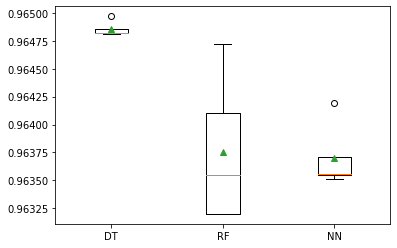

In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
kfold_data = custom_kfold(x, encoded_data, 5, ['GALAXY', 'QSO', 'STAR'])

decision_tree_classifier = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
neural_network_classifier = MLPClassifier(random_state=42)
random_forest_classifier = RandomForestClassifier(max_depth=5, random_state=42)

start = time.time()
metrics_decision = calculate_macro_mean(kfold_validate(kfold_data, decision_tree_classifier))
decision_time = time.time()
metrics_neural = calculate_macro_mean(kfold_validate(kfold_data, neural_network_classifier))
neural_time = time.time()
metrics_random_forest = calculate_macro_mean(kfold_validate(kfold_data, random_forest_classifier))
random_forest_time = time.time()


print(metrics_decision)
print(metrics_neural)
print(metrics_random_forest)

print("\nArvore Decisão:")
print("Desempenho médio: ", np.mean(metrics_decision))
print("Desvio padrão: ", np.std(metrics_decision))
print("Tempo de execução: ", decision_time - start)

print("\nRede Neural:")
print("Desempenho médio: ", np.mean(metrics_neural))
print("Desvio padrão: ", np.std(metrics_neural))
print("Tempo de execução: ", neural_time - decision_time)

print("\nFloresta Rand.:")
print("Desempenho médio: ", np.mean(metrics_random_forest))
print("Desvio padrão: ", np.std(metrics_random_forest))
print("Tempo de execução: ", random_forest_time - neural_time)

results=[]
results.append(metrics_decision)
results.append(metrics_random_forest)
results.append(metrics_neural)
plt.boxplot(results, labels=['DT','RF', 'NN'], showmeans=True)
plt.show()
#clf_dt.fit(X=X_train, y=y_train)